In [1]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("F:\project\Copper_Set.csv")

In [4]:
df.shape

(181673, 14)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
#converting the datatypes
# item_date, delivery_date, quantity tons

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [9]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
delivery_date     object
dtype: object

In [10]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [11]:
#quantity tons and selling_price have a negative values, This is impossible,
# so we need to replace the negative values

#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [12]:
df.nunique()

id               181671
item_date           250
quantity tons    181668
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16318
product_ref          33
delivery date        28
selling_price      9789
delivery_date        26
dtype: int64

In [13]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        5
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        8
delivery_date        3
dtype: int64

Handling the null values using Mean,Mode,Median.

In [14]:
# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery_date'].fillna(df['delivery_date'].mode().iloc[0], inplace=True)

In [15]:
#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [16]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref','delivery date'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,2021-07-01
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,2021-04-01
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,2021-01-01
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,2021-01-01
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,2020-07-01
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,2020-07-01
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,2020-07-01
181671,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,2020-07-01


In [17]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
delivery_date    0
dtype: int64

Encoding the catagorical columns.

In [18]:
#remove data points other than WON, LOST STATUS values.
# Filter the DataFrame to keep only 'WON' and 'LOST' status values
df = df[df['status'].isin(['Won', 'Lost'])]
df


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,2021-07-01
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,2021-04-01
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,2021-01-01
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,2021-01-01
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,2020-07-01
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,2020-07-01
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,2020-07-01
181671,2020-07-02,30.365013,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,2020-07-01


In [19]:
status_mapping = {'Won': 1, 'Lost': 0}

# Map categorical values to numerical values
df['status'] = df['status'].map(status_mapping)

In [20]:
df['status'].unique()

array([1, 0], dtype=int64)

In [21]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [22]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [23]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,2021-07-01
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,2021-04-01
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,2021-01-01
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,2021-01-01
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,577.00,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,2020-07-01
181669,2020-07-02,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,2020-07-01
181670,2020-07-02,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,2020-07-01
181671,2020-07-02,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,2020-07-01


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,150450.0,9.447211e+01,4.409098e+02,0.00001,1.070015e+01,2.993583e+01,6.486896e+01,7.025236e+04
customer,150450.0,3.027510e+07,9.454989e+06,12458.00000,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150450.0,4.539044e+01,2.448793e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,150450.0,7.711000e-01,4.201261e-01,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
item type,150450.0,4.192330e+00,1.049147e+00,0.00000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,150450.0,2.519470e+01,1.764014e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150450.0,2.618333e+00,7.115405e+00,0.18000,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150450.0,1.297835e+03,2.661582e+02,1.00000,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150450.0,4.748337e+08,7.172603e+08,611728.00000,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,150450.0,8.258093e+02,2.907625e+02,0.10000,6.710000e+02,8.110000e+02,9.510000e+02,8.123614e+04


In [90]:
df_p=df.copy()

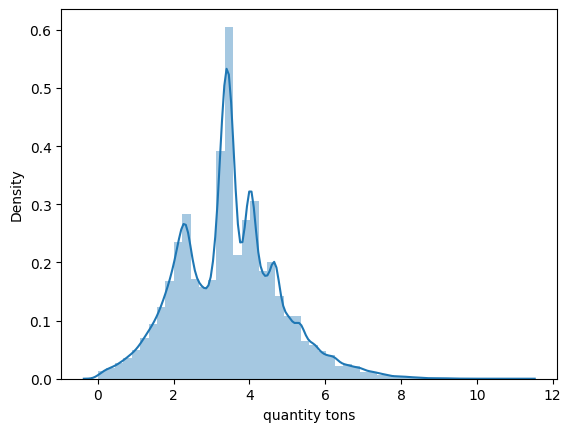

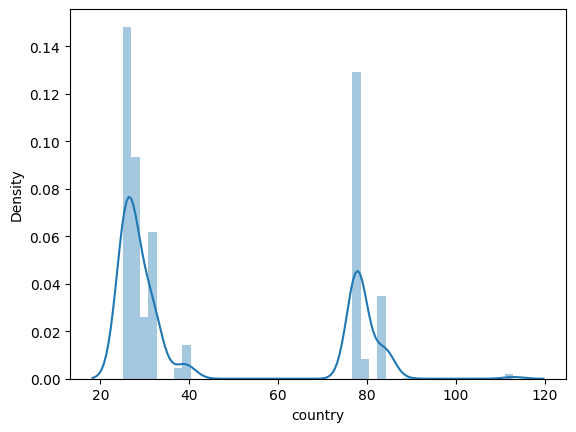

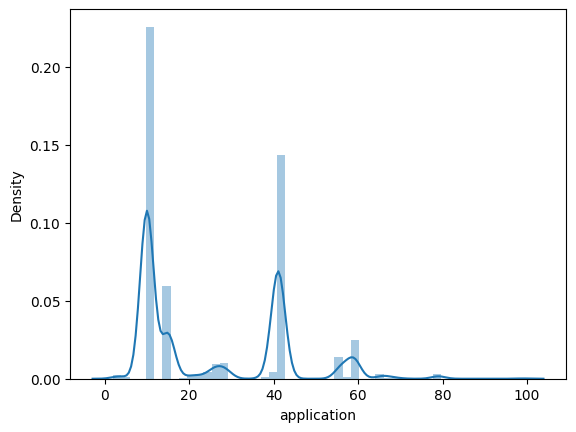

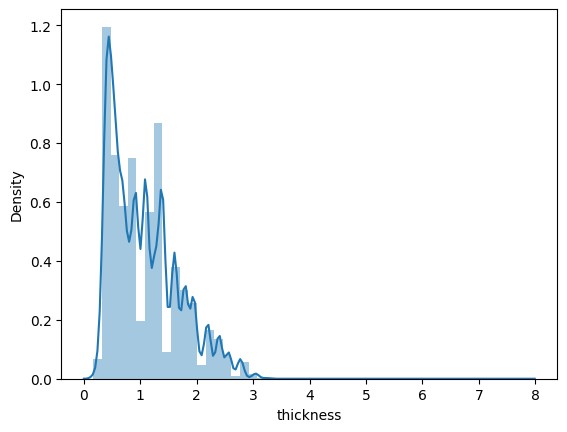

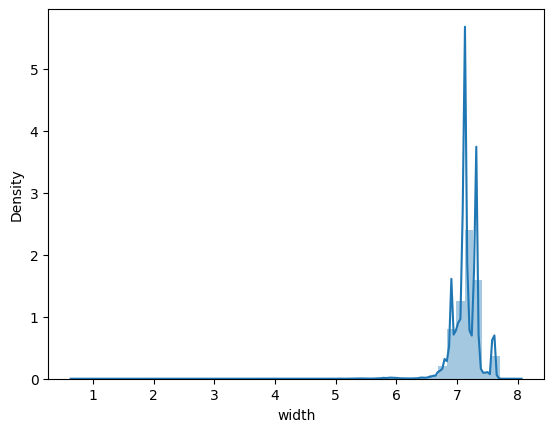

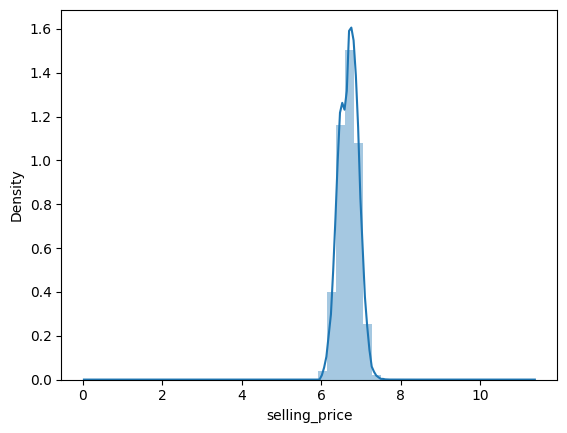

In [91]:
df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']
df_p['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df_p['quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot(df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p['width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()

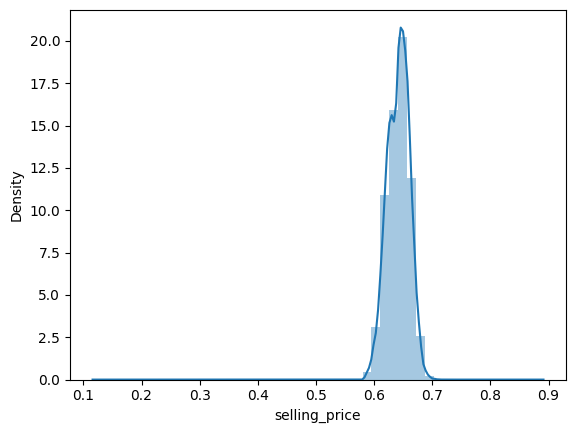

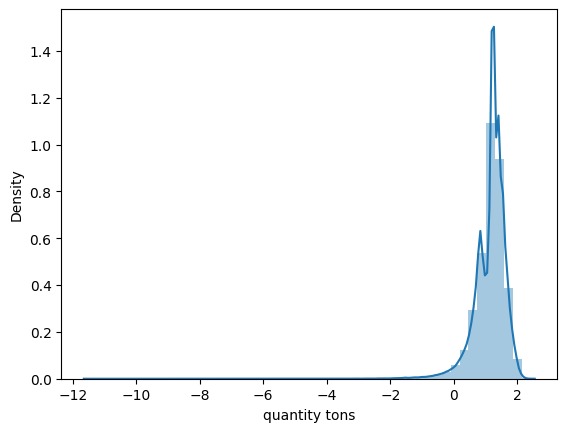

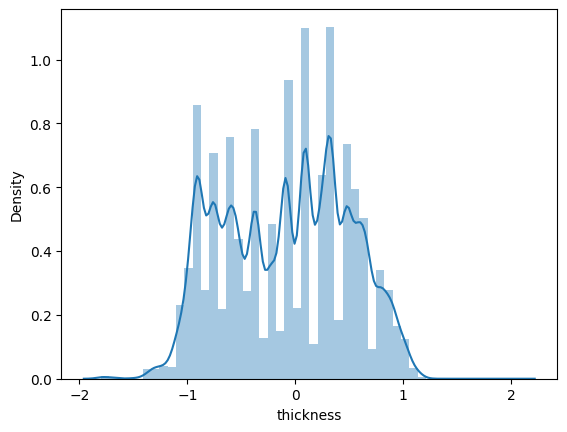

In [93]:

import numpy as np
df_p['selling_price'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price'])
plt.show()

df_p['quantity tons'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons'])
plt.show()

df_p['thickness'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness'])
plt.show()

In [94]:
#Identify variable types and distributions
continuous_vars = ['quantity tons', 'thickness', 'customer', 'selling_price']
categorical_vars = ['status', 'item_type', 'application',  'product_ref', 'country', 'customer']


In [95]:
df[continuous_vars].describe()

,quantity tons,thickness,customer,selling_price
count,150450.000000,150450.000000,1.504500e+05,150450.000000
mean,3.456320,1.071286,3.027510e+07,6.688252
std,1.327283,0.602436,9.454989e+06,0.240256
min,0.000010,0.165514,1.245800e+04,0.095310
25%,2.459602,0.553885,3.019689e+07,6.510258
50%,3.431915,0.916291,3.020531e+07,6.699500
75%,4.187667,1.386294,3.027982e+07,6.858565
max,11.159863,7.824446,2.147484e+09,11.305128


In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(df[continuous_vars])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df[continuous_vars].columns)

# Display the scaled DataFrame
print(scaled_df.head())


   quantity tons  thickness     width  selling_price
0       0.417213   0.045359  0.724002       0.261594
1       2.402513  -0.802577 -0.199992       1.108767
2       1.885389  -1.243626 -1.231163      -0.909410
3       1.400542   0.203568  0.164419      -0.179647
4       2.419467   0.893296  1.961456      -1.368039


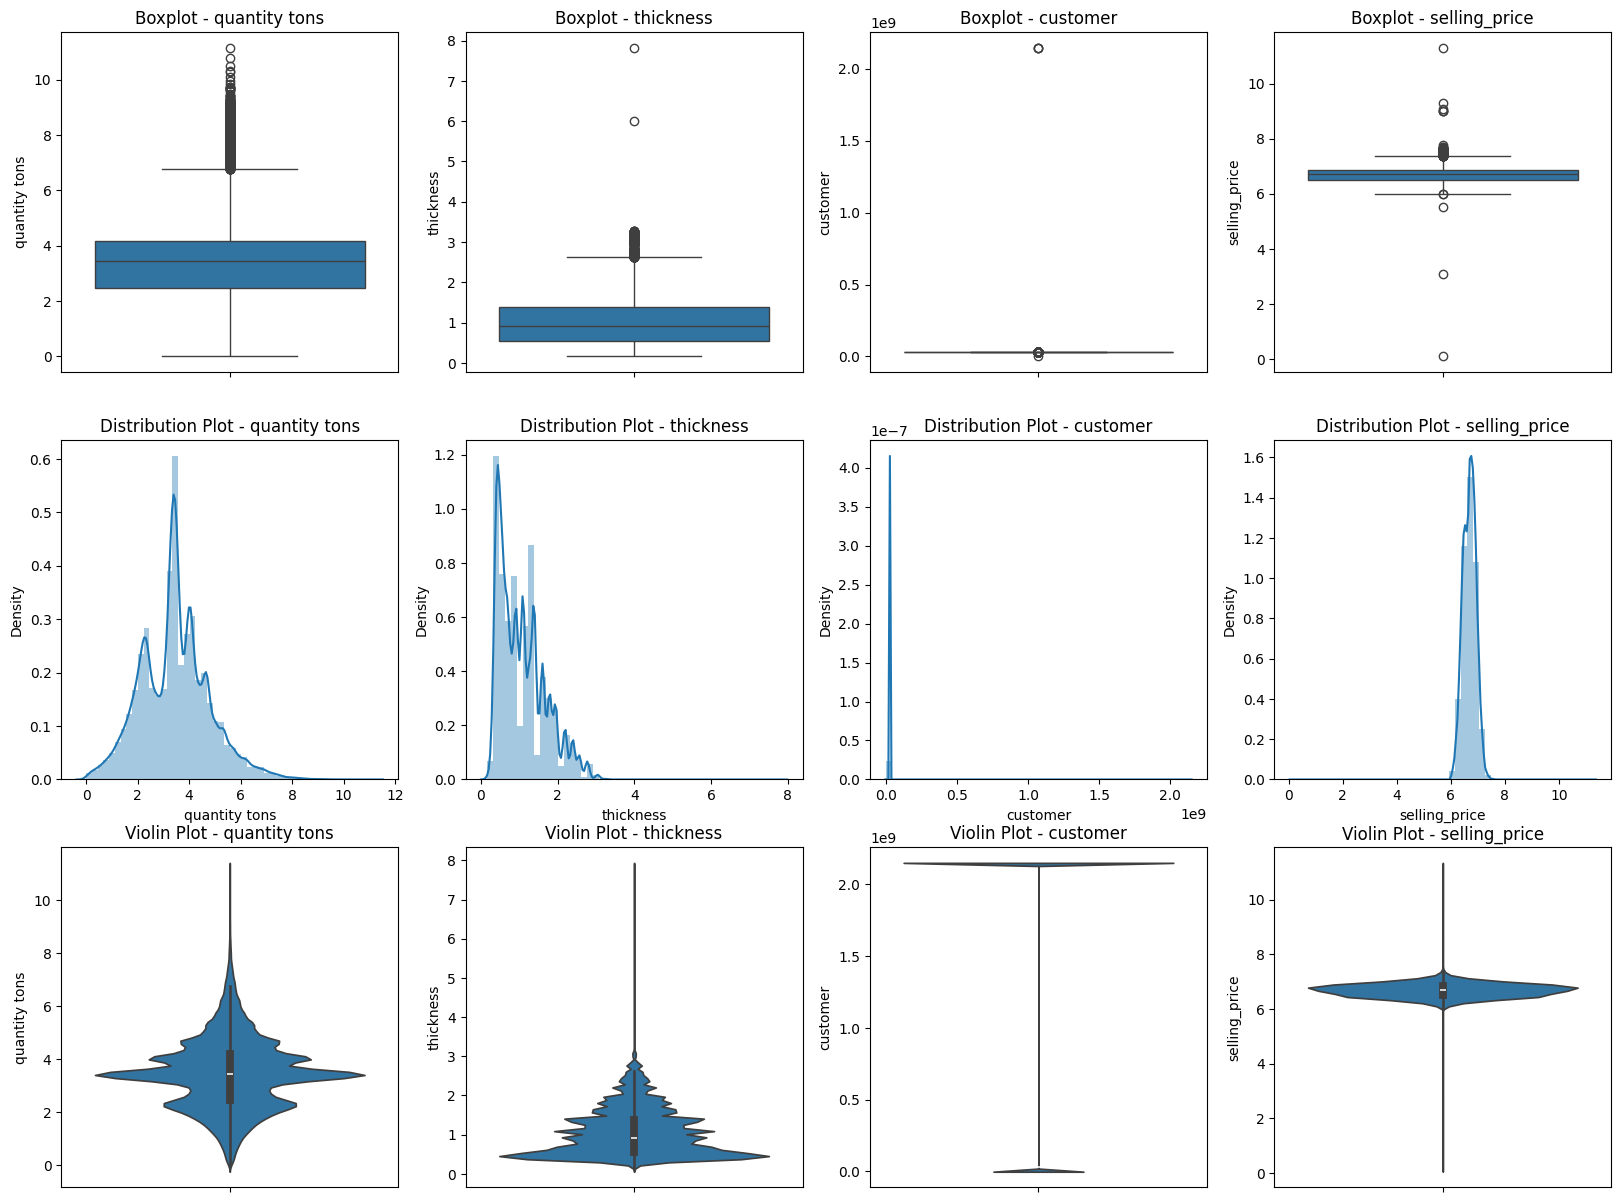

In [96]:
# Create subplots for visualizations
fig, axes = plt.subplots(nrows=3, ncols=len(continuous_vars), figsize=(20, 15))

# Plot boxplots, distribution plots, and violin plots for each numerical variable
for i, col in enumerate(continuous_vars):
    # Before outlier treatment
    sns.boxplot(y=df[col], ax=axes[0,i])
    sns.distplot(df[col], ax=axes[1,i])
    sns.violinplot(y=df[col], ax=axes[2,i])
    axes[0,i].set_title(f'Boxplot - {col}')
    axes[1,i].set_title(f'Distribution Plot - {col}')
    axes[2,i].set_title(f'Violin Plot - {col}')

Handling Skewness using Log Transformation

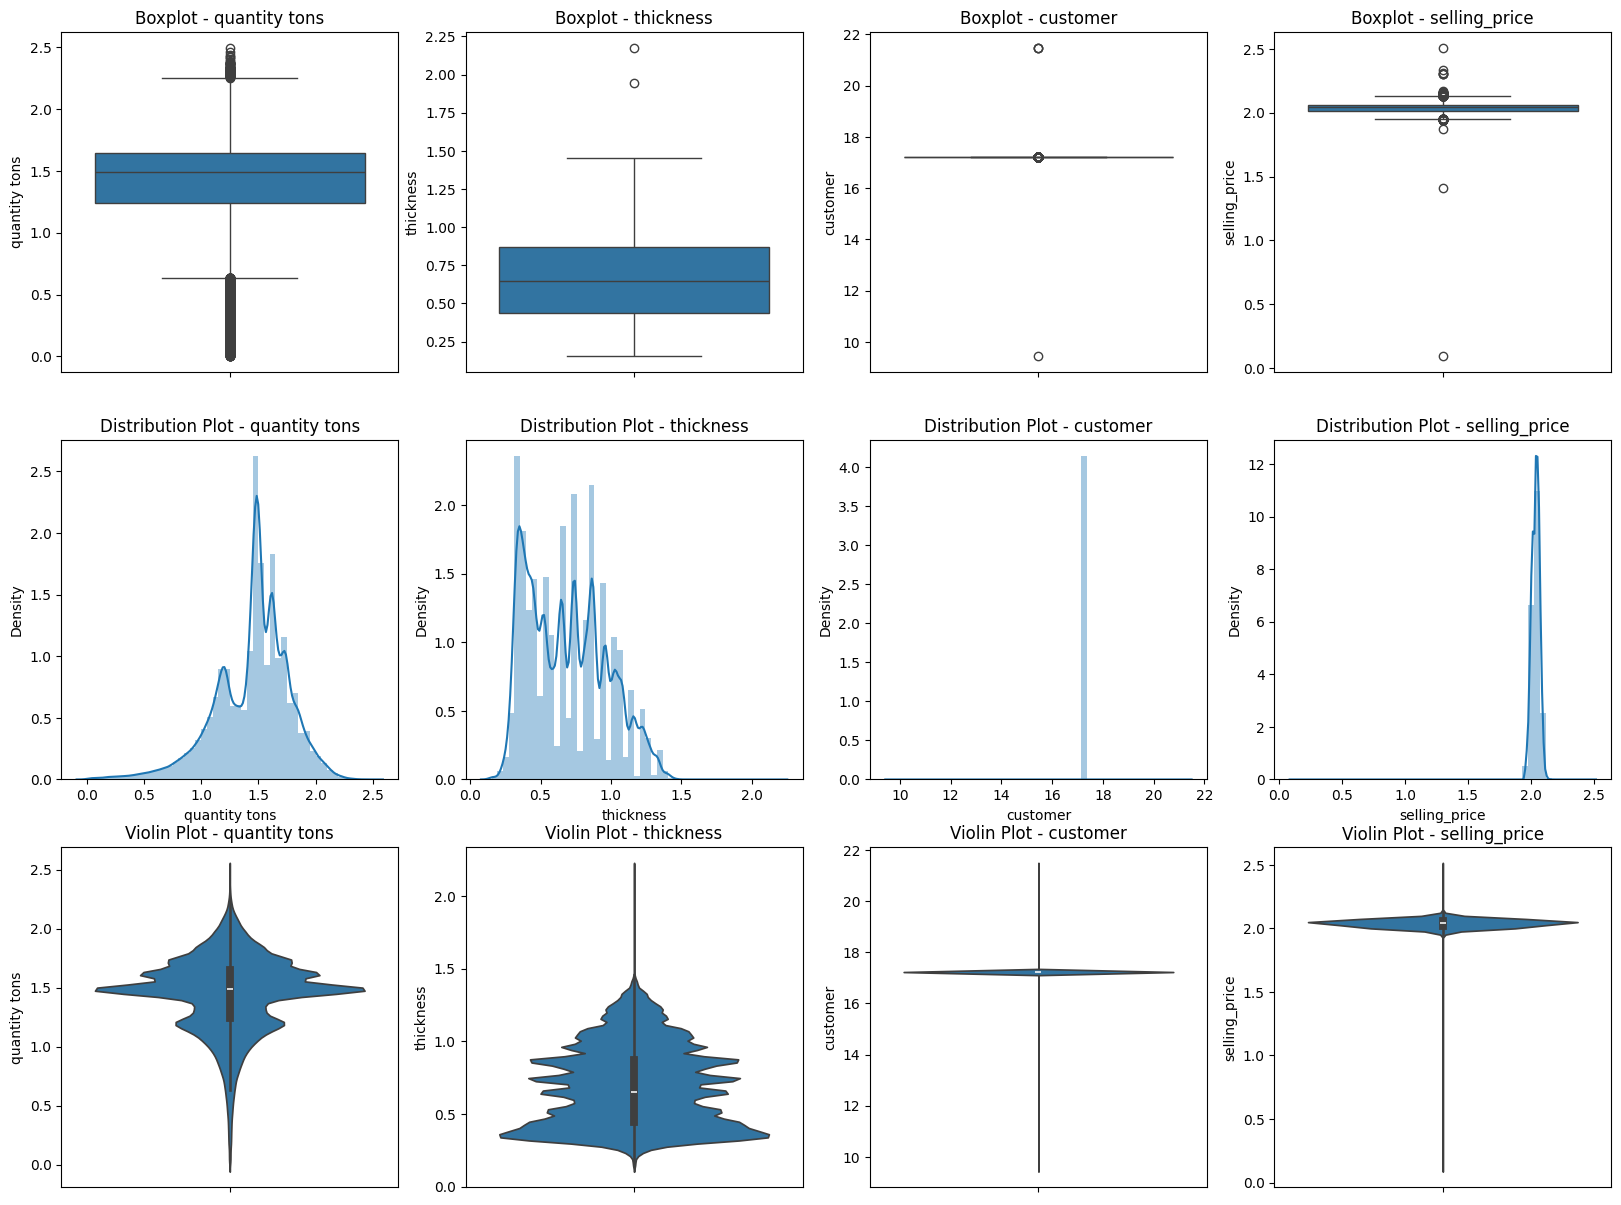

In [97]:
# Apply log transformation to each numerical variable
for col in continuous_vars:
    df[col] = np.log1p(df[col])

# Re-plot the distributions after log transformation
fig, axes = plt.subplots(nrows=3, ncols=len(continuous_vars), figsize=(20, 15))
for i, col in enumerate(continuous_vars):
    sns.boxplot(y=df[col], ax=axes[0,i])
    sns.distplot(df[col], ax=axes[1,i])
    sns.violinplot(y=df[col], ax=axes[2,i])
    axes[0,i].set_title(f'Boxplot - {col}')
    axes[1,i].set_title(f'Distribution Plot - {col}')
    axes[2,i].set_title(f'Violin Plot - {col}')


Handling outliers using IQR Method.

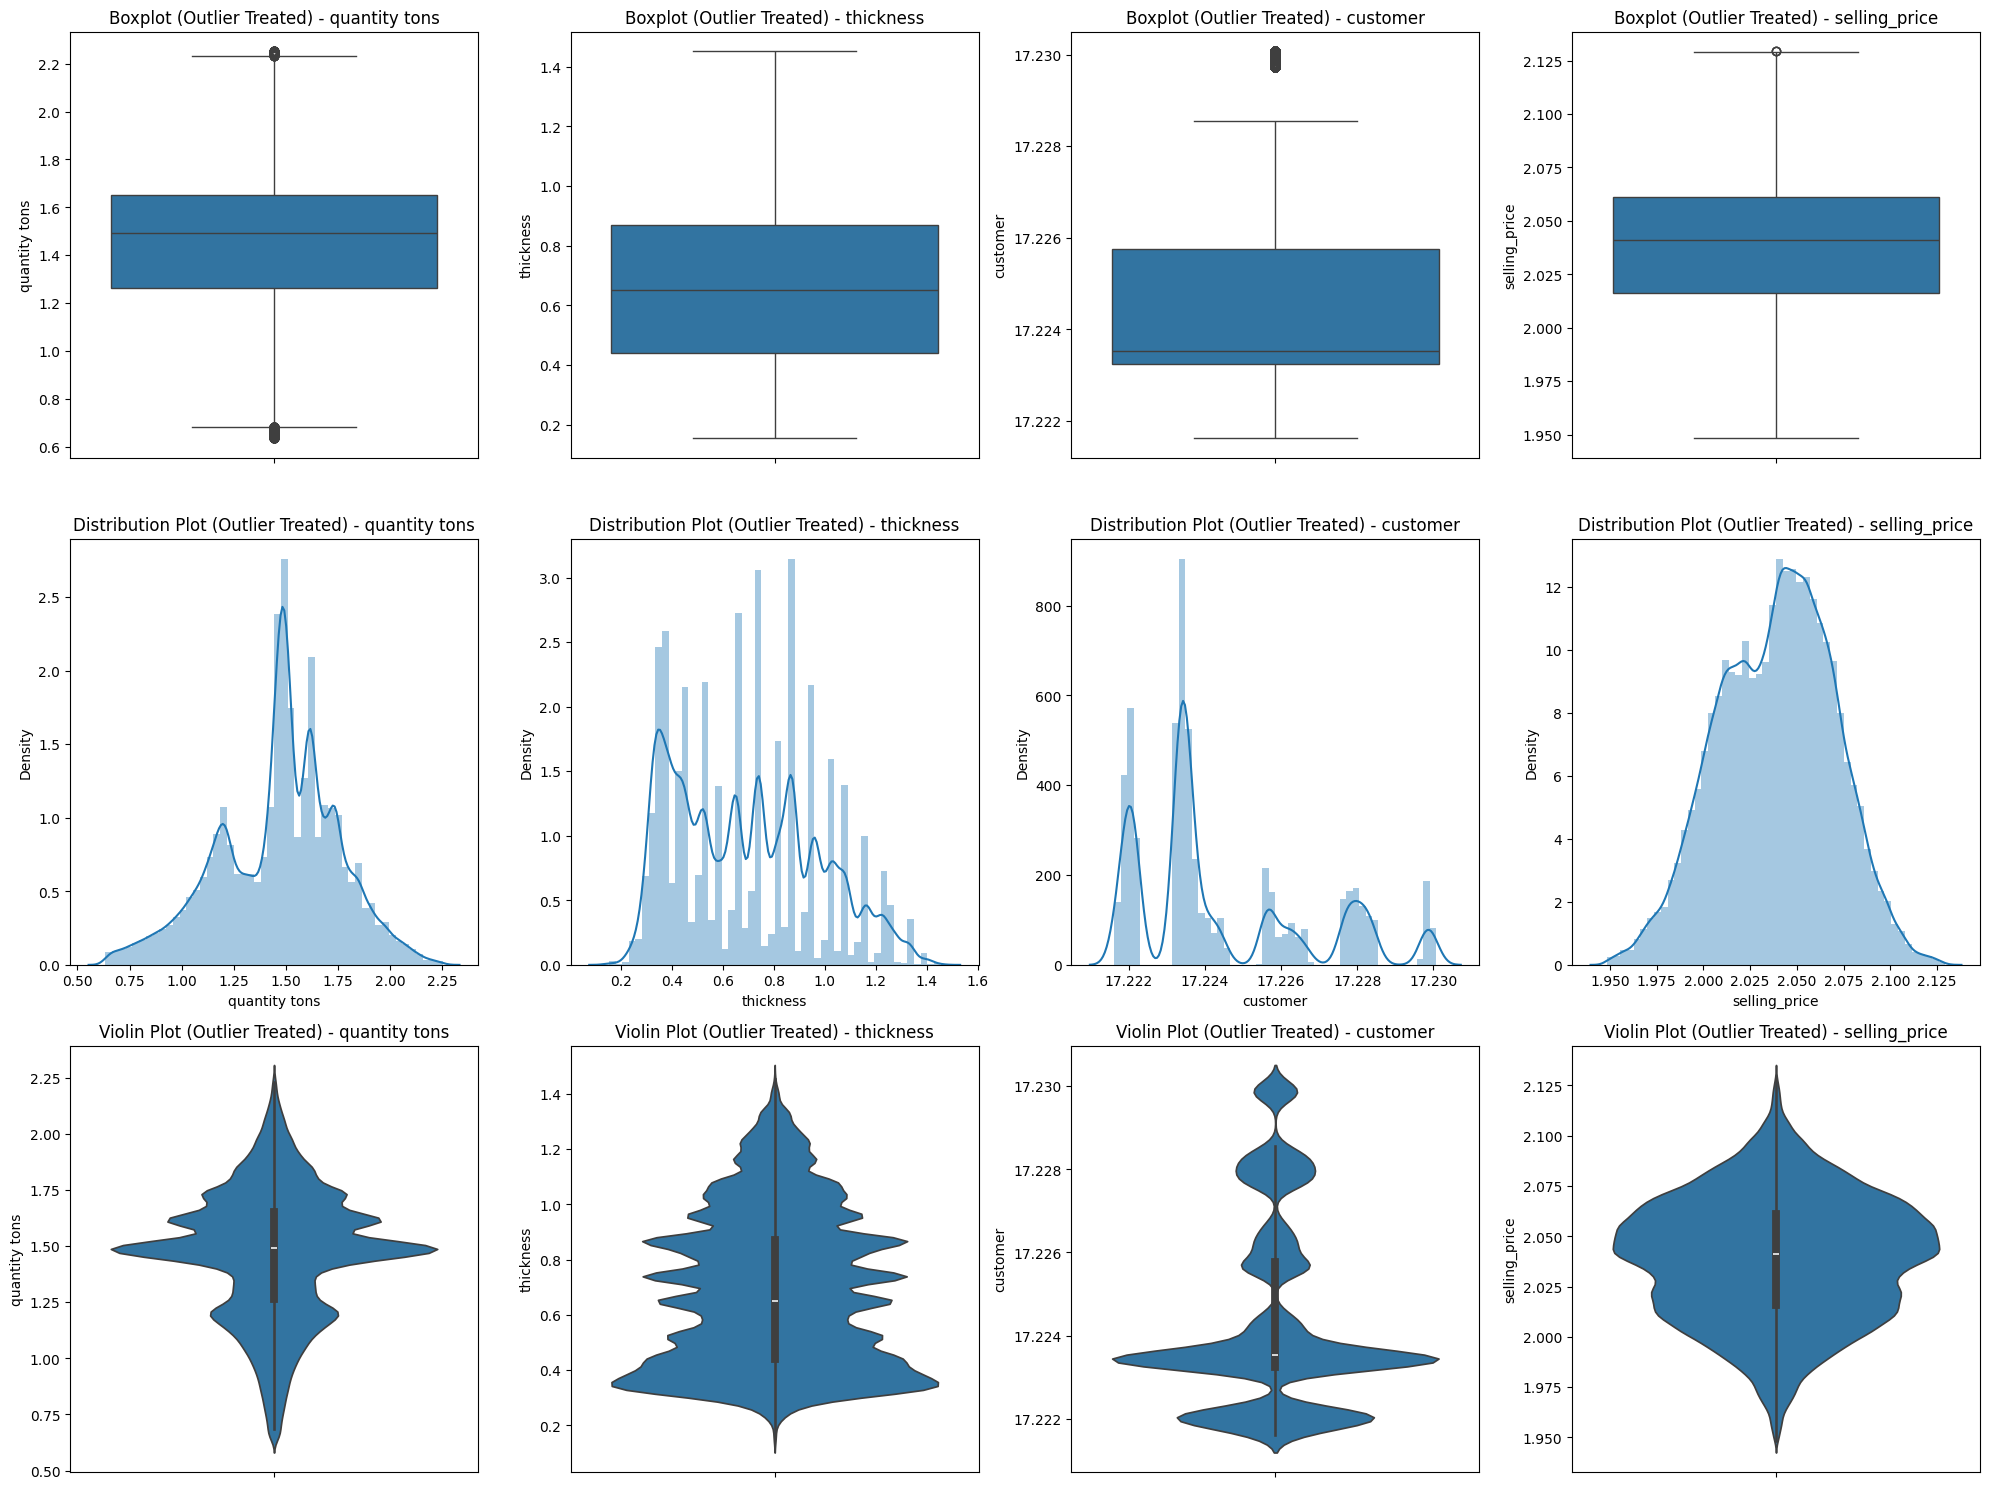

In [98]:
# Outlier treatment using IQR method
def treat_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Create subplots for visualizations
fig, axes = plt.subplots(nrows=3, ncols=len(continuous_vars), figsize=(20, 15))

# Apply outlier treatment using IQR method
df_outlier_treated = treat_outliers_iqr(df.copy(), continuous_vars)

# Plot boxplots, distribution plots, and violin plots for each numerical variable after outlier treatment
for i, col in enumerate(continuous_vars):
    # After outlier treatment
    sns.boxplot(y=df_outlier_treated[col], ax=axes[0,i])
    sns.distplot(df_outlier_treated[col], ax=axes[1,i])
    sns.violinplot(y=df_outlier_treated[col], ax=axes[2,i])
    axes[0,i].set_title(f'Boxplot (Outlier Treated) - {col}')
    axes[1,i].set_title(f'Distribution Plot (Outlier Treated) - {col}')
    axes[2,i].set_title(f'Violin Plot (Outlier Treated) - {col}')

plt.tight_layout()
plt.show()


<Axes: >

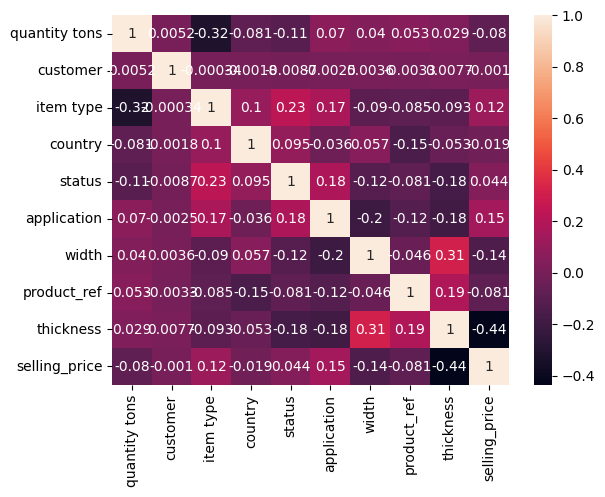

In [30]:
col = ['quantity tons','customer','item type','country','status','application','width','product_ref','thickness','selling_price']
df_heatmap = df[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [31]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,2021-07-01
1,2021-04-01,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,2021-04-01
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,6.859615,628377,6.469762,2021-01-01
3,2021-04-01,5.315229,30349574.0,32.0,1,3.0,59.0,1.193922,7.183871,1668701718,6.645091,2021-01-01
4,2021-04-01,6.667626,30211560.0,28.0,1,5.0,10.0,1.609438,7.601402,640665,6.359574,2021-03-01


Handling Wrong Delivery Dates.

In [32]:
# Convert 'item_date' column to datetime type
df['item_date'] = pd.to_datetime(df['item_date'])

# Convert 'delivery_date' column to datetime type 
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

# Calculate the difference in days between 'delivery_date' and 'item_date'
df['Date_difference'] = (df['delivery_date'] - df['item_date']).dt.days


In [33]:
df['Date_difference']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: Date_difference, Length: 150450, dtype: int64

Positive values indicate that the 'delivery_date' is after the 'item_date', 

while negative values indicate that the 'delivery_date' is before the 'item_date'.

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,2021-07-01,91,1,4,2021
1,2021-04-01,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,2021-04-01,0,1,4,2021
2,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,6.859615,628377,6.469762,2021-01-01,-90,1,4,2021
3,2021-04-01,5.315229,30349574.0,32.0,1,3.0,59.0,1.193922,7.183871,1668701718,6.645091,2021-01-01,-90,1,4,2021
4,2021-04-01,6.667626,30211560.0,28.0,1,5.0,10.0,1.609438,7.601402,640665,6.359574,2021-03-01,-31,1,4,2021


In [35]:
# Filter non-negative values of 'Date_difference' into one DataFrame
positive_df = df[df['Date_difference'] >= 0].reset_index(drop=True)
positive_df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,2021-07-01,91,1,4,2021
1,2021-04-01,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,2021-04-01,0,1,4,2021
2,2021-04-01,5.424027,30202938.0,25.0,1,5.0,41.0,0.916291,7.143618,1668701718,6.891626,2021-04-01,0,1,4,2021
3,2021-04-01,4.249521,30341428.0,38.0,1,3.0,10.0,0.470004,7.151485,1668701376,7.218177,2021-07-01,91,1,4,2021
4,2021-04-01,6.448299,30202938.0,25.0,1,5.0,41.0,0.916291,7.061334,1668701718,6.891626,2021-04-01,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135789,2020-07-02,3.503035,30227718.0,25.0,0,3.0,15.0,1.945910,7.601402,640665,6.315358,2020-08-01,30,2,7,2020
135790,2020-07-02,4.211112,30161559.0,30.0,0,3.0,10.0,1.578979,7.330405,640665,6.129050,2020-08-01,30,2,7,2020
135791,2020-07-02,4.172224,30161559.0,30.0,0,3.0,10.0,1.924249,7.330405,640665,6.126869,2020-08-01,30,2,7,2020
135792,2020-07-02,4.043552,30161559.0,30.0,0,3.0,10.0,2.180417,7.313887,640665,6.129050,2020-08-01,30,2,7,2020


In [36]:
# Filter negative values of 'Date_difference' into another DataFrame
negative_df = df[df['Date_difference'] < 0].reset_index(drop=True)
negative_df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
0,2021-04-01,5.958755,30153963.0,30.0,1,6.0,28.0,0.322083,6.859615,628377,6.469762,2021-01-01,-90,1,4,2021
1,2021-04-01,5.315229,30349574.0,32.0,1,3.0,59.0,1.193922,7.183871,1668701718,6.645091,2021-01-01,-90,1,4,2021
2,2021-04-01,6.667626,30211560.0,28.0,1,5.0,10.0,1.609438,7.601402,640665,6.359574,2021-03-01,-31,1,4,2021
3,2021-04-01,4.739589,30342192.0,32.0,1,5.0,41.0,0.518794,7.107425,611993,6.837333,2021-01-01,-90,1,4,2021
4,2021-04-01,4.744894,30342192.0,32.0,1,5.0,41.0,0.438255,7.107425,611993,6.861711,2021-01-01,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,2020-07-02,4.639402,30200854.0,25.0,1,5.0,41.0,0.672944,7.107425,164141591,6.383507,2020-07-01,-1,2,7,2020
14652,2020-07-02,5.342748,30200854.0,25.0,1,5.0,41.0,0.667829,7.313887,164141591,6.380123,2020-07-01,-1,2,7,2020
14653,2020-07-02,1.655480,30200854.0,25.0,1,5.0,41.0,0.536493,7.131699,164141591,6.429719,2020-07-01,-1,2,7,2020
14654,2020-07-02,3.445693,30200854.0,25.0,1,5.0,41.0,0.615186,7.131699,164141591,6.400257,2020-07-01,-1,2,7,2020


In [37]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [38]:
positive_df.columns


Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'selling_price', 'delivery_date', 'Date_difference', 'item_day',
       'item_month', 'item_year'],
      dtype='object')

In [ ]:
df

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def ml_delivery_date(df, algorithm):
    # Extract features and target variable
    x = df.drop(columns=['item_date', 'delivery_date', 'Date_difference'], axis=1)
    y = df['Date_difference']
    
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
    
    # Initialize and train the model
    model = algorithm().fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
 

    return metrics


In [40]:
print(ml_delivery_date(positive_df, DecisionTreeRegressor))
print(ml_delivery_date(positive_df, ExtraTreesRegressor))
print(ml_delivery_date(positive_df, RandomForestRegressor))
print(ml_delivery_date(positive_df, AdaBoostRegressor))
print(ml_delivery_date(positive_df, GradientBoostingRegressor))
print(ml_delivery_date(positive_df, XGBRegressor))

{'R2_score': 0.8912713163887173, 'Mean_squared_error': 167.5069037887993, 'Root_mean_squared_error': 12.94244581942684, 'Mean_absolute_error': 3.180529474575647}
{'R2_score': 0.9599330056195533, 'Mean_squared_error': 61.72702501196657, 'Root_mean_squared_error': 7.8566548232671245, 'Mean_absolute_error': 2.5311163886741044}
{'R2_score': 0.9454440164326982, 'Mean_squared_error': 84.04869430023197, 'Root_mean_squared_error': 9.16780749690088, 'Mean_absolute_error': 3.4319271696306934}
{'R2_score': 0.08148808411670438, 'Mean_squared_error': 1415.055181508362, 'Root_mean_squared_error': 37.61721921551834, 'Mean_absolute_error': 32.052715311549}
{'R2_score': 0.5683923058225802, 'Mean_squared_error': 664.9328043145767, 'Root_mean_squared_error': 25.786291015083513, 'Mean_absolute_error': 20.142665110342197}
{'R2_score': 0.8432736948713089, 'Mean_squared_error': 241.4518160472002, 'Root_mean_squared_error': 15.538719897314586, 'Mean_absolute_error': 10.480134977581239}


ExtraTreesRegressor has the highest R2 score on the testing data (0.95970) and relatively low MSE, RMSE, and MAE, 

suggesting good performance to have lower bias  and potentially less overfitting compared to other models, as they exhibit 

high R2 scores on the testing data and relatively low errors

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

def predict_negative_date_difference(positive_df, negative_df):
    # Extract features and target variable from positive data
    x_train_positive = positive_df.drop(columns=["item_date", "delivery_date", "Date_difference"])
    y_train_positive = positive_df["Date_difference"]

    # Extract features from negative data (to predict Date_difference)
    x_test_negative = negative_df.drop(columns=["item_date", "delivery_date", "Date_difference"])

    # Train the model using positive data
    model = ExtraTreesRegressor(random_state=42)
    model.fit(x_train_positive, y_train_positive)

    # Make predictions for the negative data
    predicted_values = model.predict(x_test_negative)

    return predicted_values

# Call the function with positive_df and negative_df
predicted_values = predict_negative_date_difference(positive_df, negative_df)

# Display the predicted values
print(predicted_values)


[48.98 77.76 98.67 ... 39.35 37.52 38.97]


In [44]:
print(predicted_values.dtype)

float64


In [45]:
# Convert float values to int
predicted_values = predicted_values.astype(int)

# Display the modified predicted values
print(predicted_values)


[48 77 98 ... 39 37 38]


In [46]:
negative_df['Date_difference']= pd.DataFrame(predicted_values)

In [47]:
negative_df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
selling_price      0
delivery_date      0
Date_difference    0
item_day           0
item_month         0
item_year          0
dtype: int64

In [48]:
def find_delivery_date(item_date, date_difference):
    # Convert item_date to datetime
    item_date = pd.to_datetime(item_date)
    # Calculate delivery date
    delivery_date = item_date + pd.to_timedelta(date_difference, unit='D')
    return delivery_date

# Apply the function to negative_df to calculate the delivery_date
negative_df["delivery_date"] = find_delivery_date(negative_df["item_date"], negative_df["Date_difference"])

# Display the DataFrame with the calculated delivery_date
print(negative_df[['item_date', 'Date_difference', 'delivery_date']])


       item_date  Date_difference delivery_date
0     2021-04-01               48    2021-05-19
1     2021-04-01               77    2021-06-17
2     2021-04-01               98    2021-07-08
3     2021-04-01               64    2021-06-04
4     2021-04-01               66    2021-06-06
...          ...              ...           ...
14651 2020-07-02               39    2020-08-10
14652 2020-07-02               39    2020-08-10
14653 2020-07-02               39    2020-08-10
14654 2020-07-02               37    2020-08-08
14655 2020-07-02               38    2020-08-09

[14656 rows x 3 columns]


In [49]:
# Concatenate the two DataFrames along the rows
combined_df = pd.concat([positive_df, negative_df], ignore_index=True)

combined_df.tail()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year
150445,2020-07-02,4.639402,30200854.0,25.0,1,5.0,41.0,0.672944,7.107425,164141591,6.383507,2020-08-10,39,2,7,2020
150446,2020-07-02,5.342748,30200854.0,25.0,1,5.0,41.0,0.667829,7.313887,164141591,6.380123,2020-08-10,39,2,7,2020
150447,2020-07-02,1.655480,30200854.0,25.0,1,5.0,41.0,0.536493,7.131699,164141591,6.429719,2020-08-10,39,2,7,2020
150448,2020-07-02,3.445693,30200854.0,25.0,1,5.0,41.0,0.615186,7.131699,164141591,6.400257,2020-08-08,37,2,7,2020
150449,2020-07-02,6.010499,30200854.0,25.0,1,5.0,41.0,0.536493,7.123673,164141591,6.410175,2020-08-09,38,2,7,2020


In [50]:
# Extract year, month, and day components from the "delivery_date" column
combined_df['delivery_year'] = combined_df['delivery_date'].dt.year
combined_df['delivery_month'] = combined_df['delivery_date'].dt.month
combined_df['delivery_day'] = combined_df['delivery_date'].dt.day

# Display the DataFrame with the new columns
combined_df.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_date,Date_difference,item_day,item_month,item_year,delivery_year,delivery_month,delivery_day
0,2021-04-01,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,2021-07-01,91,1,4,2021,2021,7,1
1,2021-04-01,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,2021-04-01,0,1,4,2021,2021,4,1
2,2021-04-01,5.424027,30202938.0,25.0,1,5.0,41.0,0.916291,7.143618,1668701718,6.891626,2021-04-01,0,1,4,2021,2021,4,1
3,2021-04-01,4.249521,30341428.0,38.0,1,3.0,10.0,0.470004,7.151485,1668701376,7.218177,2021-07-01,91,1,4,2021,2021,7,1
4,2021-04-01,6.448299,30202938.0,25.0,1,5.0,41.0,0.916291,7.061334,1668701718,6.891626,2021-04-01,0,1,4,2021,2021,4,1


In [51]:
combined_df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'selling_price', 'delivery_date', 'Date_difference', 'item_day',
       'item_month', 'item_year', 'delivery_year', 'delivery_month',
       'delivery_day'],
      dtype='object')

In [52]:
combined_df.drop(columns=["item_date","delivery_date","Date_difference"],inplace=True)

In [53]:
# Save the DataFrame as a CSV file
combined_df.to_csv('combined_data.csv', index=False)


In [54]:
combined_df=pd.read_csv('F:\project\Copper_set\combined_data.csv')

In [55]:
combined_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_day,item_month,item_year,delivery_year,delivery_month,delivery_day
0,4.010077,30156308.0,28.0,1,5.0,10.0,1.098612,7.313887,1670798778,6.751101,1,4,2021,2021,7,1
1,6.645123,30202938.0,25.0,1,5.0,41.0,0.587787,7.099202,1668701718,6.954639,1,4,2021,2021,4,1
2,5.424027,30202938.0,25.0,1,5.0,41.0,0.916291,7.143618,1668701718,6.891626,1,4,2021,2021,4,1
3,4.249521,30341428.0,38.0,1,3.0,10.0,0.470004,7.151485,1668701376,7.218177,1,4,2021,2021,7,1
4,6.448299,30202938.0,25.0,1,5.0,41.0,0.916291,7.061334,1668701718,6.891626,1,4,2021,2021,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150445,4.639402,30200854.0,25.0,1,5.0,41.0,0.672944,7.107425,164141591,6.383507,2,7,2020,2020,8,10
150446,5.342748,30200854.0,25.0,1,5.0,41.0,0.667829,7.313887,164141591,6.380123,2,7,2020,2020,8,10
150447,1.655480,30200854.0,25.0,1,5.0,41.0,0.536493,7.131699,164141591,6.429719,2,7,2020,2020,8,10
150448,3.445693,30200854.0,25.0,1,5.0,41.0,0.615186,7.131699,164141591,6.400257,2,7,2020,2020,8,8


In [141]:
combined_df.dtypes

quantity tons     float64
customer          float64
country           float64
status              int64
item type         float64
application       float64
thickness         float64
width             float64
product_ref         int64
selling_price     float64
item_day            int64
item_month          int64
item_year           int64
delivery_year       int64
delivery_month      int64
delivery_day        int64
dtype: object

In [56]:
combined_df.isnull().sum()

quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
product_ref       0
selling_price     0
item_day          0
item_month        0
item_year         0
delivery_year     0
delivery_month    0
delivery_day      0
dtype: int64

Classification method to predict WON or LOST

In [59]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [58]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ------- ------------------------------- 51.2/258.0 kB 518.5 kB/s eta 0:00:01
   -------------------------- ------------- 174.1/258.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.3 MB/s eta 0:00:00


In [60]:
combined_df["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [62]:
# Separate features and target variable
X = combined_df.drop(columns=['status'])
y = combined_df['status']

In [63]:
X.shape,y.shape

((150450, 15), (150450,))

In [64]:
# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Resample the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [65]:
X_resampled.shape,y_resampled.shape

((231084, 15), (231084,))

In [66]:
y_resampled.value_counts()

status
1    115542
0    115542
Name: count, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def accuracy_checking(x_data, y_data, algorithm):
    # Train-test splitting
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = algorithm().fit(x_train, y_train)

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Store metrics in a dictionary
    metrics = {
        "Algorithm": algorithm.__name__,
        "Accuracy_Train": accuracy_train,
        "Accuracy_Test": accuracy_test
    }

    return metrics


In [68]:
print(accuracy_checking(X,y,DecisionTreeClassifier))
print(accuracy_checking(X,y,RandomForestClassifier))
print(accuracy_checking(X,y,ExtraTreesClassifier))
print(accuracy_checking(X,y,AdaBoostClassifier))
print(accuracy_checking(X,y,GradientBoostingClassifier))
print(accuracy_checking(X,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9528414755732801}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9707211698238617}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9755068128946494}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8151379195746095, 'Accuracy_Test': 0.8130940511797939}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8367896311066799, 'Accuracy_Test': 0.8349285476902626}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.946095048188767, 'Accuracy_Test': 0.9326354270521768}


In [69]:
print(accuracy_checking(X_resampled,y_resampled,DecisionTreeClassifier))
print(accuracy_checking(X_resampled,y_resampled,RandomForestClassifier))
print(accuracy_checking(X_resampled,y_resampled,ExtraTreesClassifier))
print(accuracy_checking(X_resampled,y_resampled,AdaBoostClassifier))
print(accuracy_checking(X_resampled,y_resampled,GradientBoostingClassifier))
print(accuracy_checking(X_resampled,y_resampled,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9654239781898436}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9826038037951403}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.987299045805656}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7657667404133782, 'Accuracy_Test': 0.7658437371529957}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8115455976458752, 'Accuracy_Test': 0.8097236947443581}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9528309541454126, 'Accuracy_Test': 0.9474219443062076}


Extra Trees Classifier stands out with the highest accuracy on the testing data, reaching around 98.7%.

However, Random Forest Classifier is also a strong contender, offering slightly lower but still impressive accuracy at around 98.3%. 

Moreover, Random Forest Classifier offers a good balance between simplicity, interpretability, and performance.

In [116]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the hyperparameters grid
parameters = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [2, 4, 6],
    "max_features": ['sqrt', 'log2']
}

# Initialize GridSearchCV with RandomForestClassifier
gridsearch = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5,n_jobs=-1)

# Fit the grid search to the training data
gridsearch.fit(x_train, y_train)

# Get the best parameters
best_params = gridsearch.best_params_

# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [120]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing
from sklearn import metrics


x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2, min_samples_split=5).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9531338746233778, 0.9446091265118896)

In [123]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=2, min_samples_split=5).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Calculate accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print results
print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))



Training Accuracy: 0.9540750918227698
Testing Accuracy: 0.945604431269879
Confusion Matrix:
[[22907   316]
 [ 2198 20796]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     23223
           1       0.99      0.90      0.94     22994

    accuracy                           0.95     46217
   macro avg       0.95      0.95      0.95     46217
weighted avg       0.95      0.95      0.95     46217



The model performs well with an overall accuracy of 94.56%. It demonstrates a high precision rate for successful transactions and a slightly lower but still respectable precision rate for unsuccessful transactions. 

The recall rates are also high for both classes, indicating that the model effectively identifies instances of both successful and unsuccessful transactions.

Overall, the model shows promising performance in predicting transaction outcomes.

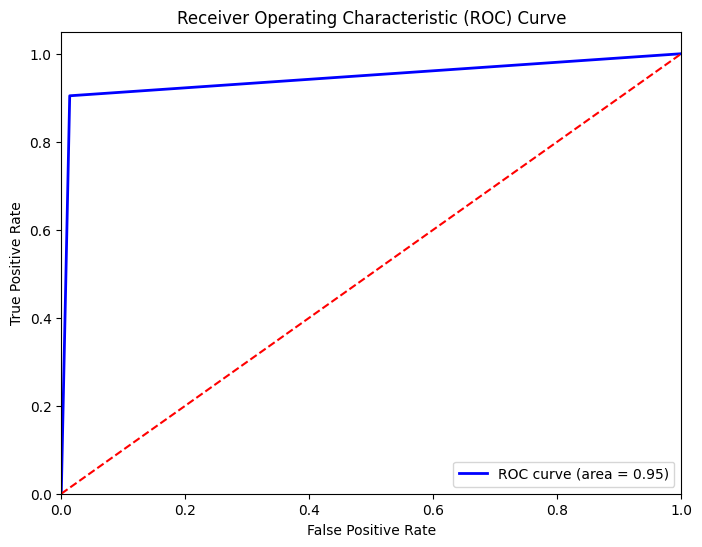

In [124]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A high AUC and a well-separated ROC curve suggest that the model is doing a good job at classifying instances into their respective classes

In [125]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[5.5, 30223403, 28, 5, 10, 0.816291, 4.151485, 1668701376, 4.891626, 1, 4, 2021, 1, 7, 2021]])

# Make prediction for the new sample using the trained model
new_predict = model.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')


Won


In [126]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [128]:
with open("F:\project\Copper_set\Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [166]:
filtered_df = combined_df[combined_df['status'] == 0]
filtered_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_day,item_month,item_year,delivery_year,delivery_month,delivery_day
118,2.274061,30223403.0,78.0,0,5.0,10.0,0.693147,7.313887,1668701718,7.134094,1,4,2021,2021,7,1
121,3.702622,30165992.0,77.0,0,3.0,10.0,0.693147,7.313887,164141591,7.111512,1,4,2021,2021,8,1
122,2.522087,30223403.0,78.0,0,5.0,10.0,1.609438,7.313887,1668701718,7.079184,1,4,2021,2021,7,1
123,3.654690,30165992.0,77.0,0,3.0,10.0,0.587787,7.131699,164141591,7.130899,1,4,2021,2021,8,1
126,2.424059,30223403.0,78.0,0,5.0,10.0,0.587787,7.313887,1668701718,7.158514,1,4,2021,2021,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150139,3.316571,30202938.0,25.0,0,3.0,41.0,0.916291,7.182352,164141591,6.555357,2,7,2020,2020,8,9
150141,3.139719,30202938.0,25.0,0,3.0,41.0,0.916291,7.182352,1668701718,6.568078,2,7,2020,2020,8,10
150143,3.102497,30202938.0,25.0,0,3.0,41.0,0.916291,7.090910,164141591,6.542472,2,7,2020,2020,8,10
150319,4.644332,30198408.0,25.0,0,3.0,10.0,0.875469,7.048386,1668701718,6.587550,2,7,2020,2020,8,4


In [167]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[4.673504,30198408.0,25.0,3.0,10,0.875469,7.044905,1668701718,6.590301,2,7,2020,2020,8,5]])

# Make prediction for the new sample using the trained model
new_predict = class_model.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')


Lost


Regression Model to Predict the Selling Price

In [111]:

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [112]:
combined_df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'item_day', 'item_month', 'item_year', 'delivery_year',
       'delivery_month', 'delivery_day'],
      dtype='object')

In [113]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    X = df.drop(columns=['selling_price'], axis=1)
    y = df['selling_price']
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [114]:

print(machine_learning_regression(combined_df, DecisionTreeRegressor))
print(machine_learning_regression(combined_df, ExtraTreesRegressor))
print(machine_learning_regression(combined_df, RandomForestRegressor))
print(machine_learning_regression(combined_df, AdaBoostRegressor))
print(machine_learning_regression(combined_df, GradientBoostingRegressor))
print(machine_learning_regression(combined_df, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9102026187775466}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9379863537091383}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9928956277762943, 'R2_test': 0.9404810144311704}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6383354810309548, 'R2_test': 0.6203466856309152}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8811527083527558, 'R2_test': 0.8724760317130204}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9452978557689435, 'R2_test': 0.9276313549827178}


Based on the results, it seems like the Random Forest Regressor have relatively high 
scores on both training and testing datasets, indicating good performance and generalization.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Separate features and target variable
X = combined_df.drop(columns=['selling_price'], axis=1)
y = combined_df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("R2 Score on Testing Data:", r2_test)


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9445907749271744
R2 Score on Testing Data: 0.9402459537394818


The R-squared score achieved on the training data is approximately 0.945, indicating that the model explains about 94.5% of the variance in the target variable. 

Additionally, the R-squared score on the testing data is approximately 0.940, suggesting that the model generalizes well to unseen data. 

Overall, these results indicate that RandomForestRegressor model with tuned hyperparameters is performing well.

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Separate features and target variable
X = combined_df.drop(columns=['selling_price'], axis=1)
y = combined_df['selling_price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model with the best parameters
model = RandomForestRegressor(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300)
model.fit(x_train, y_train)

# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print("Evaluation Metrics:")
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")




Evaluation Metrics:
R-squared (R2) Score: 0.9403517726782838
Mean Squared Error (MSE): 0.0034849245034159035
Root Mean Squared Error (RMSE): 0.05903324913483844
Mean Absolute Error (MAE): 0.031233708570382344


In [134]:
user_data = np.array([[5.543,30202938,25,1,5,41,1.0956,6.68701,1668701718,1,4,2021,1,4,2021]])
y_pred = model.predict(user_data)
y_pred[0]

6.690311527041086

In [135]:
  # using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

804.5728593086991

In [136]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [139]:
import pickle

# Load the pickle model
with open(r'F:\project\Copper_set\regression_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [140]:
y_pred = model.predict(np.array([[5.543,30202938,25,1,5,41,1.0956,6.68701,1668701718,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])

804.5728593086991